## Supervised Learning Module

### Week 4 - Regression

### What is learning in Machine Learning?

1. Gathering a training dataset
2. Building a model based on the training dataset
3. Applying the model to new data and making predictions

We can distinguish: supervised, semi-supervised, unsupervised, and reinforcement learning.

When you are using step 3, that is only involved in supervised learning.

### What is Supervised Learning?

In supervised learning the examples in the dataset are **labeled**.

The dataset $X$ contains $N$ examples.
Each example $x_i$ is represented by a feature vector of dimensionality D: $ x^{(j)} $, $j = 1..D$, meaning that there are D features. A feature can be viewed as a variable.

The **labeled** dataset has a vector of labels $y$ of dimensionality $N$:  $\{(x_i, y_i)\}^{N}_{i=1}$

### Formulation of regression problems

In regression problems the labels in the dataset are **numeric variables** of type int, float, taking **continuous** values. In other words they are not categoric variables. In statistics labels are called response variables.

In [4]:
from sklearn.datasets import load_boston # import function

boston = load_boston() # this gets the data out
X = boston.data # features 
y = boston.target # response variables # note that the labeles are also called targets

In [163]:
# !pip install --upgrade seaborn

In [2]:
X.shape   # how many examples, how many features in each feature vector? # number of features

(506, 13)

In [3]:
y.shape   # how many examples, how many features in each feature vector? # one dimensional, number of rows

(506,)

In [4]:
X[:3] # checking out the first 3 rows of the features.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [4]:
y.shape   # as many labels as examples

(506,)

In [6]:
type(y[:3]) # this is a numpy array

numpy.ndarray

In [8]:
%matplotlib inline

import pandas as pd
import seaborn as sns

d = pd.DataFrame(X, columns=boston.feature_names) #making this into a dataframe
d['y'] = pd.Series(y)

In [10]:
d.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'y'],
      dtype='object')

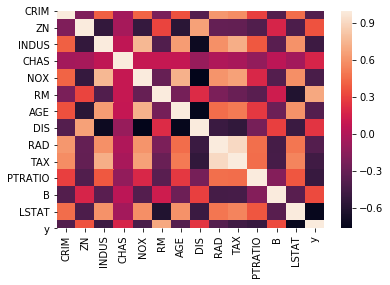

In [11]:
sns.heatmap(d.corr()) # you can put a semicolon at the end of this to get rid of the <> output. a jupyter only trick

If you could only pick one feature, you'd pick RM. (Highest correlation with R). If you can pick more than that, pick the ones most correlated with y... They will probably be the most predictive. Look for what stands out this most. In this case, LSAT and RM. In the pairplot, (a correlation matrix), you will see they also have the strongest looking scatterplots. (Looking across the bottom row).

In [ ]:
sns.pairplot(d) # this is taking a long time to run and plugging up the kernel. gonna skip it for the moment.

Note that some features could be categorical variables

In [6]:
d.columns[12]

'LSTAT'

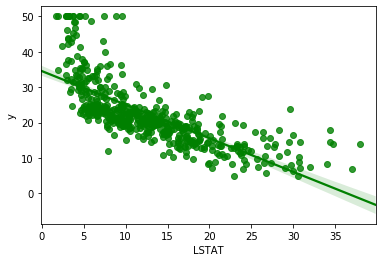

In [15]:
sns.regplot("LSTAT", "y", data=d, color="green"); #can always use shift tab to look at the default values ;) 
# originally this included, ci=None, but he decided he likes having the confidence interval so we deleted it.

Omg the green is so cute!

In [16]:
print(boston.DESCR) #description attribute shows us more about what the features are.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

As you  can see from above, there are 14 attributes.  The last one, median value of the house, is usually the target (e.g., what we are trying to predict.)

### Machine Learning methods to solve regression problems

We will consider the following methods in this class:

- Linear Regression
- Nearest Neighbors
- Decision Tree
- Random Forest
- Gradient Boosting

Various regularization techniques for regression: Ridge, LASSO regularization will be considered in the next class. ~ These help prevent overfitting which is the model memorizing the data by heart including the noise. Overfitting hurts performance on future data. Ridge and LASSO help with that by adding a penalty the model has to try to minimize. (we will discuss this in more detail in the future).

Other methods capable of both regressions and classification we will consider in the classification class.

Neural networks will be considered in Deep Learning module.

### Note: We are doing regression because the variable (median value) is continuous. If it were categorical, we would be doing classification.

### Linear regression and closed form solution

We want to build a model, which is a function with intercepts & weights (coefficients) $$f_{w, b}(x) = wx + b$$

so that it would predict us the label given new data $$y = f_{w,b}(x_{new})$$




We can formulate the training process as a linear algebra (matrix computation) problem:

$$ y=w^TX + b$$

$ w $ are the parameters of the model that we are trying to **learn** in the **training** process.

For $b=0$, $w$ could be solved with:

$ w = (X^TX)^{-1}X^Ty $

This minus one is the inverse. 

However, that finding the inverse $(X^TX)^{-1}$ matrix may not be always possible.

When we say model or algorithm, these are just functions. It takes an input and gives you an output.

In [19]:
import numpy as np
# calculate coefficients using closed-form solution
w = np.linalg.inv(X.T@X)@X.T@y # see here, we are getting coefficients (weights), one for each feature/column

w.shape # the 14th column is y, so it is not included

(13,)

In [20]:
import numpy as np
# calculate coefficients using closed-form solution. SAME THING AS  ABOVE, BUT WITH DOT FUCTION. MARTIN PREFERS @.
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 

w.shape

(13,)

In [21]:
w #taking a look at the weights (betas, coefficients) 

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

**Loss function** measures how good we predict each example. Squared error is commonly used.

$$ SE = (f_{w,b}(x_i)- y_i)^2$$
can be re-written as: $$ SE = (\hat y- y_i)^2$$

for example $i$.

The above looks a little complicated. The f(w,b) part is just standing for our function with the weight and intercept. It receives a vector of x's. Gets X at each point until x-sub-n. Lol bro it's literally just standard error. A simple form of assessing how well the model is forming.
Mathematically, we square in order to not worry about negative/positive differences cancelling each other out.

In [113]:
i = 80
b = 0 
se = (w.T.dot(X[i]) + b - y[i])**2
se

0.46685390150683787

**Cost function** is loss function for all the training examples. We will use Mean Squared Error
$$ MSE = \frac{1}{N}\sum_{i=1..N}{(f_{w,b}(x_i) - y_i)^2} $$

$$ MSE = \frac{1}{N}\sum_{i=1..N}{((wx_i + b) - y_i)^2} $$ (rewritten with our function)

Notice that  it's  just the same thing, but added for each observation, summed and divided by N. (Sum of squared errors,  sum of squares).

## Optimization

We can find the parameters $w$, $b$ that minimize **cost function** by solving an optimization problem. One such method is gradient descent method.

### Gradient descent method
Gradient shows direction towards the minimum:
$$ \frac{dMSE}{dw} =  \frac{1}{N}\sum_{i=1..N}{-2x_i(y_i - (wx_i + b))} $$

$$ \frac{dMSE}{db} = \frac{1}{N}\sum_{i=1..N}{-2(y_i - (wx_i + b))}$$


By updating $w$ and  $b$ over multiple iterations we converge to the optimal values.
We can control the rate of convergence $\alpha$

$$ w_{updated} = w_{previous} - \alpha\frac{dMSE}{dw} $$

$$ b_{updated} = b_{previous} - \alpha\frac{dMSE}{db} $$

Iterative process, slowing converging.
Rate of convergence, you can adjust, also called the learning rate. Trying to see if each point is lower, than the last point. Is MSE going down? If yes, going in right direction. 

You can now implement linear regression with gradient descent. Rate of convergence $\alpha$ is a hyperparameter.
Gradient descent will allow to use any cost function for which we can express its derivative. Think about other cost functions.

Can you identify by looking at the cost function that normalization of data is critical for Linear Regression or not?

### Sklearn implemenentation



Notice it follows the 4 steps of all sklearn.
- import
- instantiate 
- fit 
- predict
- score

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# init
lr = LinearRegression(fit_intercept=False)

In [26]:
# Learning
lr.fit(X, y) # the fit method returns the model itself, so we can see the settings

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

Notice that after learning the model, there are a lot more method options with .shifttab. 

In [27]:
# Learned model w and b:
lr.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [28]:
lr.intercept_ #this is 0 bc we set fit intercept to false.

0.0

In [32]:
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [29]:
w == lr.coef_ #rememberto use is close

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [31]:
np.isclose(w, lr.coef_)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

most the time u want default settings for linear regression. we only  set intercept to false so we could make this comparison to the matrix weights (w). just to show the weights and the coeff are the same. otherwise u will never set the intercept to false. and never use numpy to do linear regression. just a demonstration to show the math.

In [ ]:
lr.score

In [37]:
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)

0.7137381380515404

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# "predictions" based on the training dataset
y_model = lr.predict(X)  # f(x)
r2_score(y, y_model)  # MSE

0.7137381380515405

71% = fairly good. ppl like r squared bc easy to understand, but martin says there are better metrics for model performance. 

below we are creating a vector whch just has tthe averages repeated.

In [ ]:
[1] * 3 #repeats the value, in side the list, however many times, and give u back a list. 

In [31]:
y_avg = [np.average(y)]* len(y) # average repeating a certain  number of times. the nnumber is the length  of y.

In [33]:
mean_squared_error(y, y_avg) # hard to interpret bc not in the same units as y.so  to  get it back down...sq rt. :)

84.41955615616556

Null  model (for regression):
- Always predicts the average of y
- Does not use any information on the features

Null model (for classification):
- always predict the mode of y values
- does not use any info on features

Why  we care
- not smart model, we expect it to be wrong. but the reason why is we want another point of reference. for ex, for MSE. we need a perfect model, which would have an MSE of 0. the null model. in our case, the null model is 9.19. and then our model: 4.92. so these are 2 pts of ref. the perf  would have 0 error, our model is not perf, but it's better than the null model.

points of reference (mse): 
- perf model = 0
- null model = 9.19
- our model = 4.92 

you can also refer to r-squared.
- perf model = 1
- null model = 0 
- our model = .72

In [36]:
r2_score(y, y_avg)

0.0

In [37]:
r2_score(y, y_model)

0.7137381380515405

In [34]:
np.sqrt(mean_squared_error(y, y_avg))  # RMSE root mean squared error. not i ncluded in scikit learn,must use np

9.188011545278203

In [53]:
np.sqrt(mean_squared_error(y, y_model))  # RMSE

4.915902697381885

### Making predictions on new data

In [38]:
# x_new = X[100] * 0.01*np.random.random()  # new example

x_new = np.array([0.01]*13)
print(x_new)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [40]:
w = lr.coef_ #doing again what we did before
b = lr.intercept_
y_new = np.dot(w, x_new) + b # these are our new predictions
y_new

0.042578503213361665

In [41]:
# or simply: another way to do this
# lr.predict(x_new.reshape(1, -1))
lr.predict([x_new, ])

array([0.0425785])

### How data normalization effects linear regression

In [55]:
x = 5

In [63]:
x *= 5; x

30

In [ ]:
x = x * 5;x

In [43]:
from sklearn.metrics import median_absolute_error

In [44]:
median_absolute_error(y, y_model) # mean absolute error will be more sensitive to outliers. so median fixes that.

2.1900884748503557

In [67]:
mean_absolute_error(y, y_model)

8.243958643718656

In [48]:
from sklearn.preprocessing import normalize

X_copy = X.copy() # we are making a copy, to mess around with X, just for illustrative purposes
X_copy[5] *= 1000000
X_copy[4] *= 0.000001
X_copy[12] *= 0.0001
y_model = LinearRegression(fit_intercept=False).fit(X_copy, y).predict(X_copy)
mean_squared_error(y, y_model) # here you can see, the MSE is much higher bc of the crazy data

109.68635099566367

In [49]:
X_norm = normalize(X_copy)
y_model = LinearRegression(fit_intercept=False).fit(X_norm, y).predict(X_norm)
mean_squared_error(y, y_model) # by normalizing it, you are helping the error be more realistic

21.6410630103583

In [73]:
mean_absolute_error(y, y_avg) #taking the absolute value of the error, instead of squaring.

6.647207423956008

In [75]:
median_absolute_error(y, y_avg) # see median is less skewed than mean squre rror.

4.732806324110676

### How outliers affect linear regression?

### Regression with Nearest Neighbors
How do we find nearest neighbor?

How many nearest neighbors?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/500px-KnnClassification.svg.png)

In [78]:
X[0].shape

(13,)

In [76]:
X.shape

(506, 13)

In [164]:
from scipy.spatial.distance import euclidean

euclidean(X[0], X[1])

58.955079696240766

In [164]:
from scipy.spatial.distance import minkowski

euclidean(X[0], X[1])

58.955079696240766

In [79]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [80]:
nbrs

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [169]:
# distances to 3 closest neighbors
distances

array([[ 0.        , 16.0970999 , 16.99995447],
       [ 0.        , 15.39261599, 18.97631935],
       [ 0.        ,  8.07879279,  8.89317332],
       ...,
       [ 0.        ,  3.94748354,  9.40019876],
       [ 0.        ,  3.94748354,  8.83081803],
       [ 0.        ,  4.2784823 ,  9.31201061]])

In [171]:
# indices of 3 closest neighbors
indices

array([[  0, 241,  62],
       [  1,  47,   2],
       [  2,  85,  87],
       ...,
       [503, 504, 219],
       [504, 503, 219],
       [505, 502, 504]])

Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero.
It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [40]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [95]:
from sklearn.neighbors import KNeighborsRegressor

nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

What is the model in case of Nearest Neighbors?

In [96]:
y_pred_nn = nnr.predict(X)

In [97]:
varname = d.columns[12]

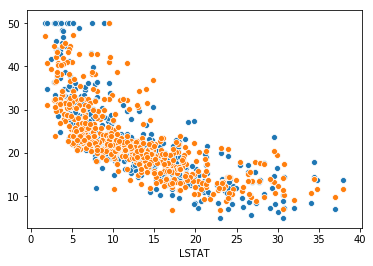

In [98]:
sb.scatterplot(d[varname], y)
sb.scatterplot(d[varname], y_pred_nn)

In [99]:
nnr.score(X, y)

0.7868514704495158

Notice how KNN handles nonlinearity!

Also, what does NNR(n_neighbors=1) mean?

In [176]:
indices = np.random.randint(2, size=X.shape[0]).astype(bool)
# indices

In [177]:
#np.logical_not(indices)

55.813115468409585

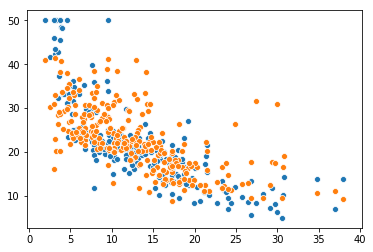

In [178]:
X_train = X[indices]
X_test = X[np.logical_not(indices)]
y_train = y[indices]
y_test = y[np.logical_not(indices)]

nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X_train, y_train)
y_pred_nn = nnr.predict(X_test)

sb.scatterplot(X_test[...,12], y_test)
sb.scatterplot(X_test[...,12], y_pred_nn)

mean_squared_error(y_test, y_pred_nn)

In [ ]:
sb.scatterplot(X_train[...,12], y_train)
y_pred_nn_train = nnr.predict(X_train)
sb.scatterplot(X_train[...,12], y_pred_nn_train)

What are the main hyperparameters of KNN Regressor?
- distance metric
- K

### Rule-based model:
Regression with decision tree

How a tree is built?

Hyperparameters: tree depth, cutoff

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528907338/regression-tree_g8zxq5.png)

In [156]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
dtr = DecisionTreeRegressor(max_depth=5)

# Fit
dtr.fit(X_train, y_train)

# Predict
y_predicted = dtr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

25.001178022067204

### Ensemble methods

collection of weak (poor performing) models makes a strong and robust model

### Ensemble methods: bagging - Random Forest

![](https://dsc-spidal.github.io/harp/img/4-5-1.png)

Features:
    - sampling of training examples with replacement
    - subsampling the features
    - shallow trees

In [160]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Fit 
rf.fit(X_train, y_train)

# Predict
y_predicted = rf.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


17.918512295081968

### Ensemble methods: boosting - Gradient Boosting
Sequential improvement of models by training on their errors

![](https://littleml.files.wordpress.com/2017/03/boosted-trees-process.png?w=992)

See also: http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html


In [1]:
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
gbr = GradientBoostingRegressor()

In [161]:
# Fit 
gbr.fit(X_train, y_train)

# Predict
y_predicted = gbr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

12.666934741997123

### Homework assignment